# Day 15: Chiton

In [1]:
import numpy as np
from heapq import heappush, heappop, heapify

from IPython.core.display import display, HTML

In [2]:
def load_input(filename):
    matrix = []
    with open(filename) as fr:
        for line in fr:
            line = line.strip()
            matrix.append([int(c) for c in line])
    return np.array(matrix)

In [3]:
m = load_input('15-sample.txt')
assert m.shape == (10, 10)
m[5,3]  # Access using y, x
assert m[5, 3] == 9

In [4]:
def neighbours(m, y, x):
    max_y, max_x = m.shape
    if y-1 >= 0:
        yield m[y-1, x], y-1, x
    if x + 1 < max_x:
        yield m[y, x+1], y, x+1
    if y + 1 < max_y:
        yield m[y+1, x], y+1, x
    if x-1 >= 0:
        yield m[y, x-1], y, x-1
    
assert list(neighbours(m, 2, 2)) == [
    (8, 1, 2),
    (6, 2, 3),
    (9, 3, 2),
    (1, 2, 1)
]
assert list(neighbours(m, 0, 0)) == [(1, 0, 1), (1, 1, 0)]
assert list(neighbours(m, 0, 9)) == [(2, 1, 9), (4, 0, 8)]
assert list(neighbours(m, 9, 9)) == [(1, 8, 9), (8, 9, 8)]
assert list(neighbours(m, 9, 0)) == [(1, 8, 0), (3, 9, 1)]

In [5]:
visited = np.zeros(m.shape, bool)
assert visited.sum() == 0
visited[0, 0] = True
assert visited.sum() == 1

In [61]:
def show_map(values, path=None):
    path = path or []
    max_x, max_y = values.shape
    buff = ['<table>']
    for y in range(max_y):
        buff.append('<tr>')
        for x in range(max_x):
            value = values[y, x]
            if (y, x) in path:
                buff.append(f'<th style="background-color: silver"><b>{value}</b></th>')
            else:
                buff.append(f'<td>{value}</td>')
        buff.append('</tr>')
    buff.append('</table>')
    return HTML('\n'.join(buff))

In [62]:
l = [ (12, 1,1), (5, 2, 3), (3, 1, 1) ,(2,1,0)]
heapify(l)
print(l, type(l), len(l))
while l:
    print(heappop(l))

[(2, 1, 0), (5, 2, 3), (3, 1, 1), (12, 1, 1)] <class 'list'> 4
(2, 1, 0)
(3, 1, 1)
(5, 2, 3)
(12, 1, 1)


In [63]:
pow(2, 32)

4294967296

In [130]:
def dijkstra(m, tron=True):
    if tron: 
        print('dijkstra starts')
    visited = np.zeros(m.shape, bool)
    distance = np.full(m.shape, 4294967296)
    distance[0, 0] = 0
    frontier = [(0, 0, 0)]
    heapify(frontier)
    iteration = 0
    while frontier:
        iteration += 1
        v, y, x = heappop(frontier)
        visited[y, x] = True
        if tron:
            print(f"--[ Iteracion {iteration} ]-----------------")
            print(f"  Examinando nodo y: {y} x: {x} -> {m[y, x]}")
        if iteration > 1500000:
            print('Stack overflow')
            break 
        if tron: 
            print(f"  Añadiendo vecinos de ({y}, {x}) a la frontera")
        for _value, _y, _x in neighbours(m, y, x):
            if visited[_y, _x]:
                if tron:
                    print(f"     - Descarta ({_y}, {_x}) (Ya visitado)")
                continue
            new_distance = distance[y, x] + m[_y, _x]
            if tron:
                print(f"  new_distance is {new_distance} ({distance[y, x]} + {m[_y, _x]})")
            if new_distance < distance[_y, _x]:
                distance[_y, _x] = new_distance
                if tron: 
                    print("     - new distance set")    
            if (_y, _x) not in set([(yy, xx) for _, yy, xx in frontier]):
                if tron:
                    print(f"     - Añade ({_value}, {_y}, {_x}) a la frontera")
                heappush(frontier, (new_distance, _y, _x))
            
        if tron:
            print(f'  Frontera tiene ahora {len(frontier)} items')
            for index, (v, y, x) in enumerate(frontier):
                print(f'    - {index}) x={x} y={y} => {v}')
            display(show_map(distance, set([(yy, xx) for _, yy, xx in frontier])))

    return distance

In [131]:
def find_shortest_path(distance):
    max_y, max_x = distance.shape
    x = max_x - 1
    y = max_y - 1
    value = distance[y, x]
    while (y, x) != (0, 0):
        yield (y, x)
        value, y, x = min(neighbours(distance, y, x))

In [132]:
def total_cost(m, path):
    return sum([
        m[y, x]
        for y, x in path])

In [133]:
m = load_input('15-sample.txt')
assert m.shape == (10, 10)
distance = dijkstra(m, tron=False)
shortest_path = list(find_shortest_path(distance))
display(show_map(m, shortest_path))
print('Total cost:', total_cost(m, shortest_path))

1,1,6,3,7,5,1,7,4,2
1,3,8,1,3,7,3,6,7,2
2,1,3,6,5,1,1,3,2,8
3,6,9,4,9,3,1,5,6,9
7,4,6,3,4,1,7,1,1,1
1,3,1,9,1,2,8,1,3,7
1,3,5,9,9,1,2,4,2,1
3,1,2,5,4,2,1,6,3,9
1,2,9,3,1,3,8,5,2,1
2,3,1,1,9,4,4,5,8,1


Total cost: 40


In [134]:
show_map(distance, shortest_path)

0,1,7,10,17,22,23,30,34,36
1,4,12,11,14,21,23,29,32,34
3,4,7,13,18,19,20,23,25,33
6,10,16,17,26,22,21,26,31,38
13,14,20,20,24,23,28,27,28,29
14,17,18,27,25,25,33,28,31,36
15,18,23,32,34,26,28,32,33,34
18,19,21,26,30,28,29,35,36,43
19,21,30,29,30,31,37,40,38,39
21,24,25,26,35,35,39,44,46,40


## Solution part one

In [135]:
m = load_input('15-input.txt')
assert m.shape == (100, 100)
distance = dijkstra(m, tron=False)
shortest_path = list(find_shortest_path(distance))
print('Total cost:', total_cost(m, shortest_path))

Total cost: 621


## Extra

In [136]:
from PIL import Image, ImageDraw

# https://betterfigures.org/2015/06/23/picking-a-colour-scale-for-scientific-graphics/


COLOR_SCALE = [
    '#800026',
    '#be0026',
    '#e41a1c',
    '#fd4e2a',
    '#fe8e3c',
    '#ffb34c',
    '#ffda76',
    '#ffeea1',
    '#ffffcd',
    '#FFFFFF',
]

def iter_world(world):
    max_y, max_x = world.shape
    for y in range(max_y):
        for x in range(max_x):
            yield world[y, x], y, x
            

def draw_world(world, path=None, scale=5):
    path = path or []
    max_y, max_x = world.shape
    new_size = (max_x * scale, max_y * scale)
    img = Image.new('RGBA', new_size)
    draw = ImageDraw.Draw(img)
    for (level, y, x) in iter_world(world):
        box = (x*scale, y*scale, x*scale+scale-2, y*scale+scale-2)
        color = "#000000" if (y, x) in path else COLOR_SCALE[level]
        draw.rectangle(box, fill=color)
    return img

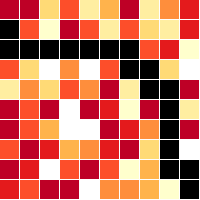

In [137]:
m = load_input('15-sample.txt')
distance = dijkstra(m, tron=False)
shortest_path = list(find_shortest_path(distance))
draw_world(m, shortest_path, scale=20)

In [138]:
distance.min(), distance.max(), distance

(0,
 46,
 array([[ 0,  1,  7, 10, 17, 22, 23, 30, 34, 36],
        [ 1,  4, 12, 11, 14, 21, 23, 29, 32, 34],
        [ 3,  4,  7, 13, 18, 19, 20, 23, 25, 33],
        [ 6, 10, 16, 17, 26, 22, 21, 26, 31, 38],
        [13, 14, 20, 20, 24, 23, 28, 27, 28, 29],
        [14, 17, 18, 27, 25, 25, 33, 28, 31, 36],
        [15, 18, 23, 32, 34, 26, 28, 32, 33, 34],
        [18, 19, 21, 26, 30, 28, 29, 35, 36, 43],
        [19, 21, 30, 29, 30, 31, 37, 40, 38, 39],
        [21, 24, 25, 26, 35, 35, 39, 44, 46, 40]]))

(100, 100)


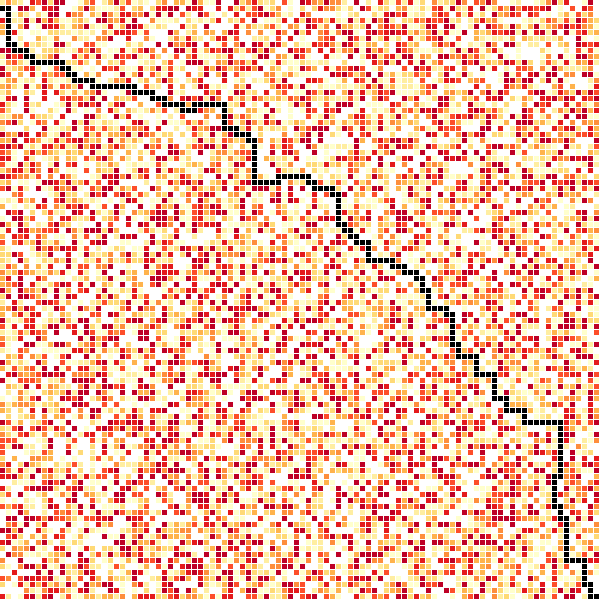

In [139]:
m = load_input('15-input.txt')
print(m.shape)
distance = dijkstra(m, tron=False)
shortest_path = list(find_shortest_path(distance))
draw_world(m, shortest_path, scale=6)

## part two

In [140]:
d = np.array(range(9)).reshape(3, 3)


### Manhttan distance (Wikipedia)

<https://en.wikipedia.org/wiki/Taxicab_geometry>

In [141]:
def manhattan(p0, p1):
    x0, y0 = p0
    x1, y1 = p1
    return (max(x0, x1) - min(x0, x1)) + (max(y0, y1) - min(y0, y1))

assert manhattan((0, 0), (0, 0)) == 0
assert manhattan((0, 0), (0, 1)) == 1
assert manhattan((0, 0), (1, 0)) == 1
assert manhattan((0, 0), (1, 1)) == 2
assert manhattan((7, 6), (3, 2)) == 8

In [142]:
m = np.array(range(9)).reshape(3,3)
m, m == 0, m + (m == 0)

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[ True, False, False],
        [False, False, False],
        [False, False, False]]),
 array([[1, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]))

In [143]:
def expanse(m, factor=5):
    max_y, max_x = size = m.shape
    new_size = (max_y * factor, max_x * factor)
    result = np.full(new_size, 0)
    for y in range(factor):
        offset_y = y * max_y
        for x in range(factor):
            offset_x = x * max_x
            distance = manhattan((0, 0), (y, x))
            delta = m
            for _ in range(distance):
                delta = delta + 1
                delta = delta % 10
                delta += (delta == 0)
            result[offset_y:offset_y+max_y, offset_x:offset_x+max_x] = delta
    return result

In [144]:
m = np.array(range(4)).reshape(2, 2)
m = expanse(m, factor=5)
display(show_map(m))
# draw_world(m, scale=20)

0,1,1,2,2,3,3,4,4,5
2,3,3,4,4,5,5,6,6,7
1,2,2,3,3,4,4,5,5,6
3,4,4,5,5,6,6,7,7,8
2,3,3,4,4,5,5,6,6,7
4,5,5,6,6,7,7,8,8,9
3,4,4,5,5,6,6,7,7,8
5,6,6,7,7,8,8,9,9,1
4,5,5,6,6,7,7,8,8,9
6,7,7,8,8,9,9,1,1,2


Total cost: 315


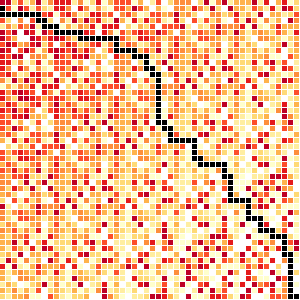

In [154]:
m = load_input('15-sample.txt')
m = expanse(m, factor=5)
distance = dijkstra(m, tron=False)
shortest_path = list(find_shortest_path(distance))
print('Total cost:', total_cost(m, shortest_path))
img = draw_world(m, shortest_path, scale=6)
img.save('shortest-path.png')
img

Total cost: 2904


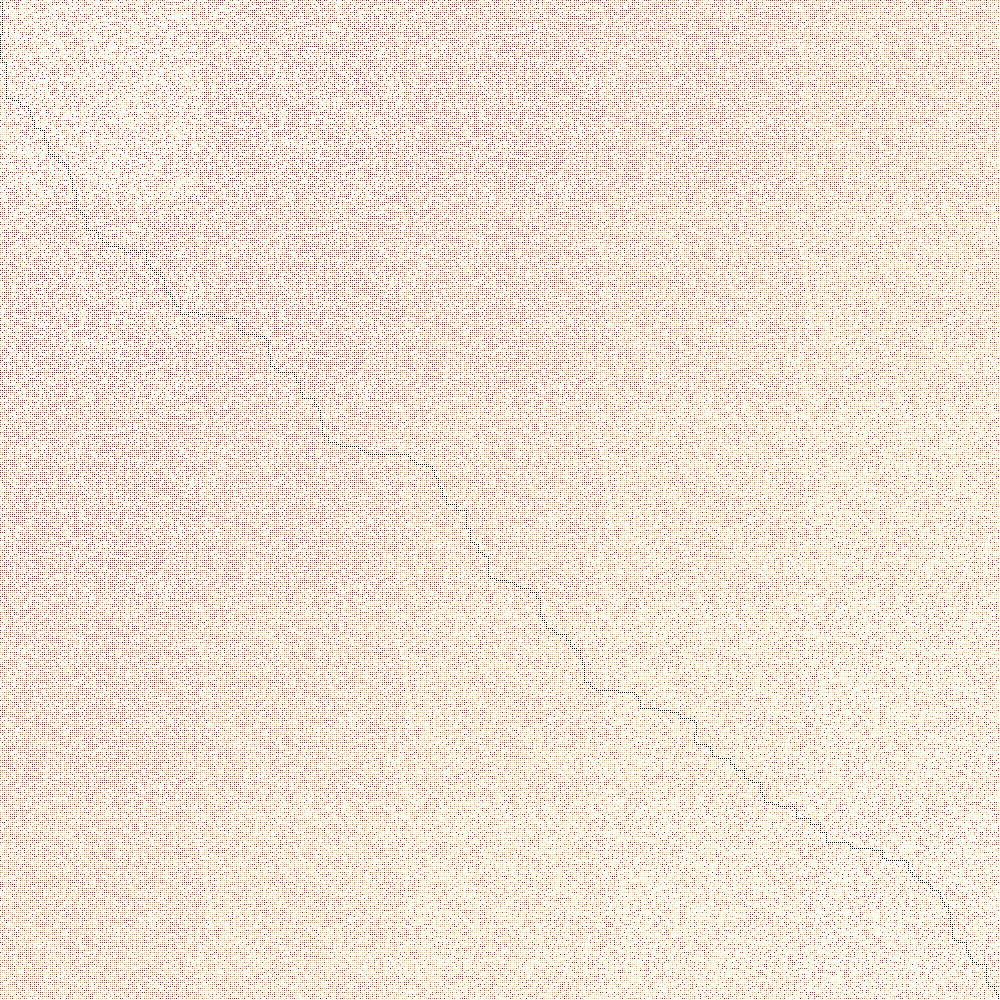

In [147]:
m = load_input('15-input.txt')
m = expanse(m, factor=5)
distance = dijkstra(m, tron=False)
shortest_path = list(find_shortest_path(distance))
print('Total cost:', total_cost(m, shortest_path))
draw_world(m, shortest_path, scale=2)


## Solution part two

In [151]:
m = load_input('15-input.txt')
m = expanse(m, factor=5)
distance = dijkstra(m, tron=False)
shortest_path = list(find_shortest_path(distance))
print('Solution part two:', total_cost(m, shortest_path))

Solution part two: 2904
